# Ridge, Lasso, and Elastic Net Regression: A Comparative Analysis 📉

In this notebook, we explore three popular regularization techniques in regression: **Ridge**, **Lasso**, and **Elastic Net**. Each model applies penalties to control model complexity and prevent overfitting, but they do so in unique ways, making each one suited to different types of data and modeling goals.

## Goals of This Notebook:
- Understand the fundamental differences between Ridge, Lasso, and Elastic Net.
- Apply these models to a dataset and compare their performance.
- Analyze the impact of each model on feature coefficients.

Let's dive in! 🚀


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [47]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=3, random_state=42, noise=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [48]:
models_info = dict()
def model_evaluation(model, name, X_test=X_test, y_test=y_test):
    y_pred = model.predict(X_test)
    print(f'r2 : {r2_score(y_test, y_pred)}')
    print(f'coef : {model.coef_}')
    models_info[name] = model.coef_

## Lasso Regression Model 🎯

Lasso regression introduces a **L1 penalty** to the model, encouraging sparsity in the feature coefficients. This leads to some coefficients being set to zero, which is beneficial for feature selection and model simplification.

We’ll apply Lasso regression to observe its effect on feature coefficients.


In [49]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
model_evaluation(lasso_model, 'lasso')

r2 : 0.9877224156799507
coef : [-0.          6.29772118  9.31655964 31.27919677 -0.          0.
 -0.          0.         -0.          0.        ]


## Ridge Regression Model 🏋️

Ridge regression adds a **L2 penalty** to the loss function, which means it minimizes the sum of squared coefficients. This penalty term reduces the size of the coefficients, effectively helping to prevent overfitting while keeping all features in the model.

In this section, we’ll train a Ridge regression model and analyze its coefficients.


In [50]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
model_evaluation(ridge_model, 'ridge')

r2 : 0.9888964350791042
coef : [-3.51759631e-02  7.26229729e+00  1.02396522e+01  3.22076179e+01
 -1.43371417e-01  1.68796851e-01 -5.13581748e-03  1.43399842e-01
 -7.04406910e-02  6.14070585e-02]


## Elastic Net Regression Model 🔗

Elastic Net combines both **L1 and L2 penalties**, balancing the benefits of Ridge and Lasso. This model is particularly useful when dealing with highly correlated features or a high number of features in the dataset.

In this section, we’ll train an Elastic Net model and evaluate its feature selection abilities and coefficient shrinkage.


In [51]:
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)
model_evaluation(elastic_model, 'elastic_net')

r2 : 0.986839303412313
coef : [-3.47167609e-03  6.91834653e+00  9.78022232e+00  3.06416143e+01
 -1.20617003e-01  1.12051907e-01 -5.10973984e-03  4.90513463e-02
 -5.33636696e-02  2.43913268e-02]


## Analyzing Model Coefficients 🔍

Visualizing the coefficients for each model helps us understand how they handle feature importance differently. Ridge tends to keep all features but reduces their magnitude, while Lasso may exclude some features entirely by setting their coefficients to zero. Elastic Net combines both approaches.

Here, we plot the coefficients of each model for comparison.

In [52]:
df = pd.DataFrame(models_info)
df.columns.name = 'models_coef'
df.index.name = 'featur_index'
df

models_coef,lasso,ridge,elastic_net
featur_index,,,
0,-0.000000,-0.035176,-0.003472
1,6.297721,7.262297,6.918347
2,9.316560,10.239652,9.780222
3,31.279197,32.207618,30.641614
4,-0.000000,-0.143371,-0.120617
5,0.000000,0.168797,0.112052
6,-0.000000,-0.005136,-0.005110
7,0.000000,0.143400,0.049051
8,-0.000000,-0.070441,-0.053364


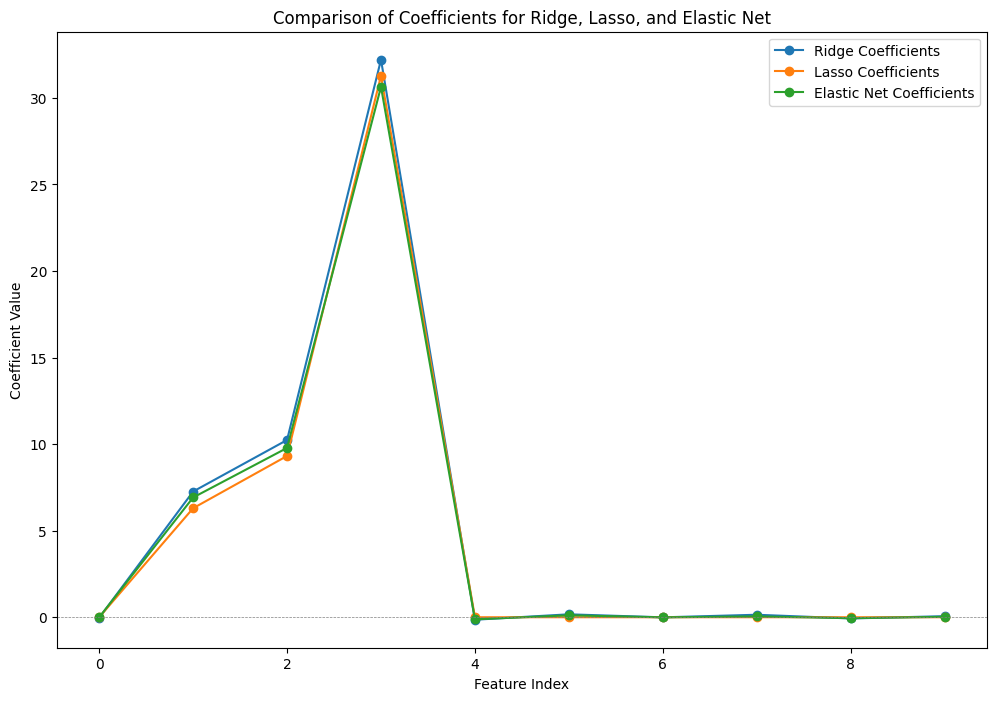

In [53]:
features = range(X.shape[1])
plt.figure(figsize=(12, 8))

plt.plot(features, models_info['ridge'], label="Ridge Coefficients", marker='o')
plt.plot(features, models_info['lasso'], label="Lasso Coefficients", marker='o')
plt.plot(features, models_info['elastic_net'], label="Elastic Net Coefficients", marker='o')

plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Coefficients for Ridge, Lasso, and Elastic Net")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Summary and Key Takeaways 📝

After exploring Ridge, Lasso, and Elastic Net models, here are the main insights:

- **Ridge**: Ideal for datasets where all features are potentially useful. It reduces overfitting by shrinking coefficients but keeps all features.
- **Lasso**: Effective for feature selection. It sets some coefficients to zero, helping simplify models when only a subset of features are important.
- **Elastic Net**: A balance between Ridge and Lasso, suitable for datasets with many correlated features or when both shrinkage and feature selection are needed.

### Choosing the Right Model:
- Use **Ridge** if all features are likely to contribute to the outcome.
- Use **Lasso** if you want a simpler model with fewer features.
- Use **Elastic Net** if you have many features and suspect some correlation among them.

Thank you for exploring regularization with us! 😊
